In [1]:
from micrograd import *
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import random

random.seed(1234)

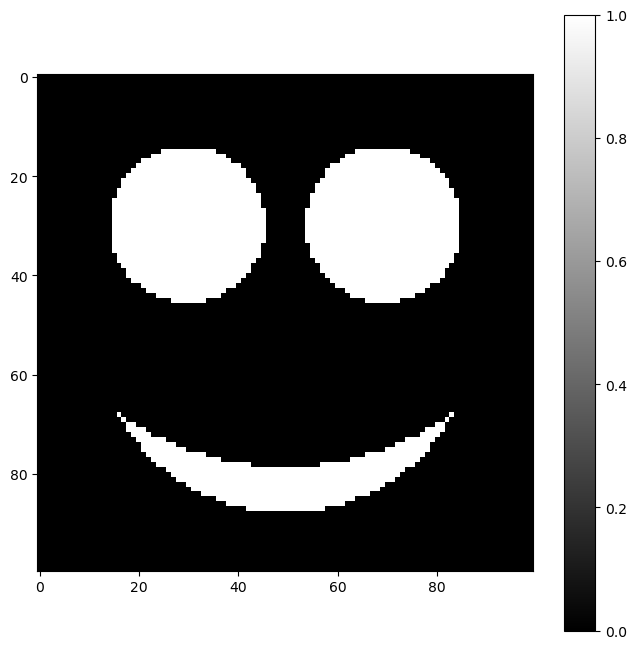

In [2]:
def load_image(path):
    img = Image.open(path)
    img_array = np.array(img)[:,:,0]
    return (img_array > 128).astype(int)

IMG = load_image("smiley_wink_r100.jpeg")

# training data
def f(x, y):
    h, w = IMG.shape
    i = max(0, min(int(x*h), h-1))
    j = max(0, min(int(y*w), w-1))
    return IMG[i, j]

def f(x, y):
    return (x-0.3)**2 + (y-0.2)**2 < 0.25

def f(x, y):

    left_eye = ((x-0.3)**2 + (y-0.3)**2 < 0.025)
    right_eye = ((x-0.3)**2 + (y-0.7)**2 < 0.025)

    upper_lip = ((x-0.2)**2 + (y-0.5)**2 < 0.35)
    lower_lip = ((x-0.5)**2 + (y-0.5)**2 < 0.15)
    mouth = ~upper_lip and lower_lip
    
    return left_eye or right_eye or mouth


# visualize training data
data = []
for x in np.linspace(0,1,100):
    for y in np.linspace(0,1,100):
        data.append([f(x,y)])

plt.figure(figsize=(8,8))
plt.imshow(np.array(data).reshape(100,100), cmap='gray')
plt.colorbar()
plt.show()

In [3]:
i_epoch = 0
mlp = MLP(2, [25, 25, 25, 25, 1])
batch_size = 64
learning_rate = 0.005

def compute_bce_loss(Y_pred, Y_target):
    assert len(Y_pred) == len(Y_target)
    loss = 0.0
    for y_pred, y_target in zip(Y_pred, Y_target):
        loss += -y_target*y_pred.log() - (1 - y_target)*(1 - y_pred).log()
    loss /= len(Y_pred)
    return loss


for k in range(500):

    # sample a random point in [0,1] x [0,1]
    X = [[random.random(), random.random()] for _ in range(batch_size)]
    Y_target = [f(x[0], x[1]) for x in X]

    # forward pass
    Y_pred = [mlp(x).sigmoid() for x in X]
    
    # compute loss (BCE)
    loss = compute_bce_loss(Y_pred, Y_target)
    
    # backward pass
    for p in mlp.parameters():
        p.grad = 0.0
    loss.backward()

    # update
    for p in mlp.parameters():
        p.data -= learning_rate * p.grad

    # log
    i_epoch += 1
    print(f"epoch {i_epoch} loss {loss.data:.3f}", end="\r")
    if i_epoch % 50 == 0:
        print()

epoch 50 loss 0.669
epoch 100 loss 0.659
epoch 150 loss 0.525
epoch 200 loss 0.627
epoch 250 loss 0.572
epoch 300 loss 0.517
epoch 350 loss 0.471
epoch 400 loss 0.488


In [ ]:
# visualize training result
data = []
for x in np.linspace(0,1,20):
    for y in np.linspace(0,1,20):
        data.append(mlp([x,y]).sigmoid().data)

plt.figure(figsize=(8,8))
plt.imshow(np.array(data).reshape(20,20), cmap='gray')
plt.colorbar()
plt.show()

In [7]:
for i_epoch in range(10000):

    if (i_epoch-1 % 250 == 0) or (i_epoch == 1):
        print(f"epoch {i_epoch}")

epoch 1


In [3]:
i_epoch = 1000
i_epoch % 1000

0